In [15]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_excel('Копия БД SLM (образец).xlsx')

In [17]:
data.head()

,ID,Марка,Группа материала,Класс,Отрасль применения,Область применения,Форма частиц,Cредний размер частиц. мкм (объемное распределение),Шероховатость поверхности. мкм (после построения),Защитная среда,...,Предел прочности. МПа,Температура плавления. ⁰С,Максимальная температура применения составляет. ⁰С,Разница значение осей\nэквивалентного эллипса гранул W. мкм,Площадь\nповерхности гранулы S пов.\nмкм²,Площадь\nпроекции гранулы S экв.\nмкм²,Минимальная рекомендуемая толщина слоя. мкм,Минимальная толщина стенки. мм,Методы изготовления порошка,Фирмы производители и поставщики
0,1,AlSi10Mg (DE),Металл,Алюминиевый сплав,Аэрокосмическая отрасль. \nавтомобильная промы...,Изготовление тонкостенных деталей с невысокой ...,Сфероидная. характерно наличие мелких сателлит...,39.62,Ra 15 — 19\n Rz 30 — 40,аргон,...,397.0,590.0,500.0,2.0,49.199,46.612,30.0,0.4,Electrode Induction Guide Inert Gas Atomizatio...,Concept Laser (DE). EOS (DE). \nSLM Solution (...
1,2,316L (US),Металл,Нержавеющая сталь,Авиастроение.\n пищевая промышленность. \nхими...,Изготовление металлических рам для морской и ...,Сфероидная. характерно наличие мелких сателлит...,36.19,Ra 13 — 5 \nRz 80 — 20,азот,...,580.0,1440.0,550.0,1.0,35.912,34.712,25.0,0.4,Vacuum Induction Melt Inert Gas Atomization (V...,3D Systems (US). Realizer (DE).\n Phenix Syst...
2,3,Ti6Al4V (JP),Металл,Титановый сплав,Технология машиностроения. \nмедицина. \nавтом...,Изготовление биомеханических протезов и детале...,Сфероидная. характерно наличие мелких сателлит...,24.86,Ra 15 — 19\n Rz 96 — 115,аргон,...,570.0,1600.0,400.0,1.0,48.182,42.231,20.0,0.4,Electrode Induction Guide Inert Gas Atomizatio...,Concept Laser (DE). SLM Solutions (DE). \nRay...
3,4,Inconel 718 (US),Металл,Никельхромовый сплав,Ракетнокосмическая промышленность. авиастроение\n,Изготовление турбин и \nракетных двигателей,Сфероидная. характерно наличие мелких сателлит...,44.56,Ra 10 — 15\n Rz 50 — 90,азот,...,1200.0,1260.0,704.0,1.0,48.673,43.198,20.0,0.3,Vacuum Induction Melt Inert Gas Atomization (V...,Special Metals Corporation (US). \nSLM Solut...
4,5,PA12 (DE),Полимер,Полиамид,Электротехническая. радиотехническая. автомоб...,Трубки. фитинги. шланги. штуцеры. крышки,Сфероидная. характерно наличие мелких сателлит...,38.51,Ra 10 — 11\n Rz 30 — 50,нет,...,100.0,178.0,120.0,1.0,38.911,35.129,30.0,0.8,Vacuum Induction Melt Inert Gas Atomization (V...,Hangzhou Guozhen Wanxin Coating \nEquipments M...


In [18]:
elements = [f for f in data.columns if '%' in f]
elem = data[elements]

In [19]:
elem.shape

(262, 32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


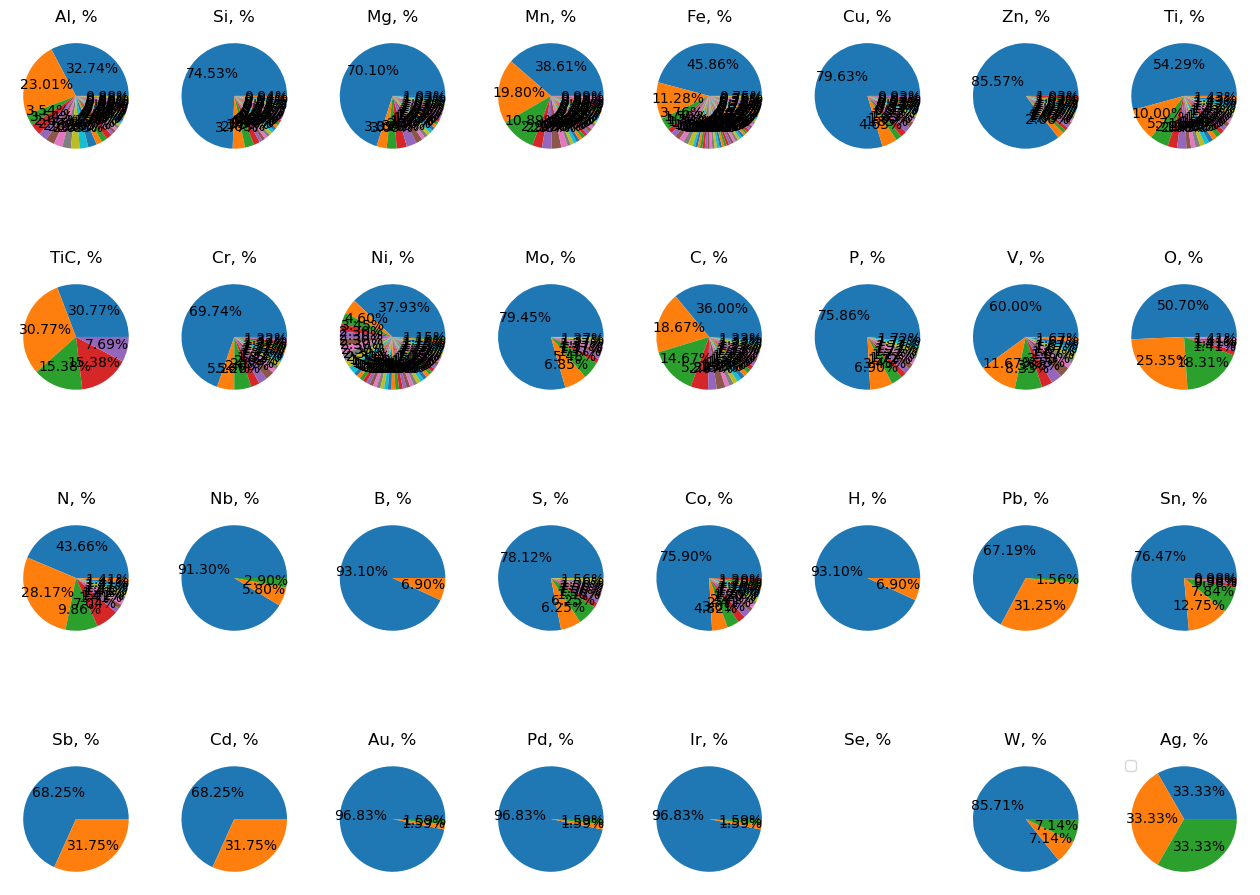

In [44]:
plt.figure(figsize=(16, 12))
plt.title('Частота появления элемента для разных материалов')
for i, col in enumerate(elem.columns):
    plt.subplot(4, 8, i+1)
    plt.pie(elem[col].value_counts(), autopct = "%0.2f%%")#, labels = elem[col].value_counts().keys())    
    plt.title(col)
plt.legend()
plt.show()

<AxesSubplot:>

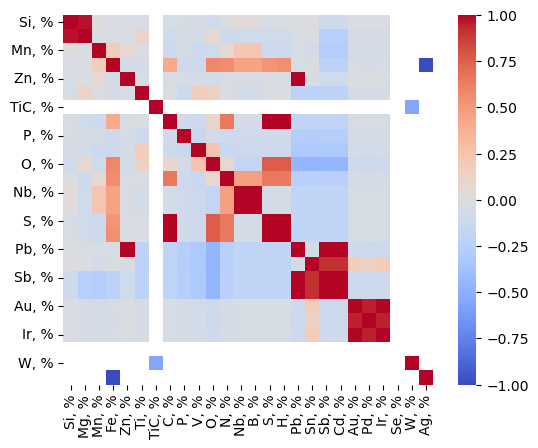

In [6]:
sns.heatmap(elem.corr(), 
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True)

# KNN

In [20]:
from sklearn import preprocessing 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [21]:
# целевая переменная
y = data['Класс']
X = elem

In [22]:
X_new = X.fillna(0)

In [23]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al, %   262 non-null    float64
 1   Si, %   262 non-null    float64
 2   Mg, %   262 non-null    float64
 3   Mn, %   262 non-null    float64
 4   Fe, %   262 non-null    float64
 5   Cu, %   262 non-null    float64
 6   Zn, %   262 non-null    float64
 7   Ti, %   262 non-null    float64
 8   TiC, %  262 non-null    float64
 9   Cr, %   262 non-null    float64
 10  Ni, %   262 non-null    float64
 11  Mo, %   262 non-null    float64
 12  C, %    262 non-null    float64
 13  P, %    262 non-null    float64
 14  V, %    262 non-null    float64
 15  O, %    262 non-null    float64
 16  N, %    262 non-null    float64
 17  Nb, %   262 non-null    float64
 18  B, %    262 non-null    float64
 19  S, %    262 non-null    float64
 20  Co, %   262 non-null    float64
 21  H, %    262 non-null    float64
 22  Pb

In [24]:
scaler = StandardScaler()

X_new_scaled = scaler.fit_transform(X_new)

In [28]:
encoded_X=pd.get_dummies(X_new)

In [87]:
my_label = preprocessing.LabelEncoder()  
encoded_y= my_label.fit_transform(y)  

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split

knn = KNeighborsClassifier(n_neighbors=len(set(encoded_y)))

In [32]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X_new_scaled, y, test_size=0.3, random_state=17
)

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [34]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

C:\Users\ivan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6708860759493671

# PCA

In [35]:
import numpy as np
from sklearn.decomposition import PCA

Projecting 32-dimensional data to 2D


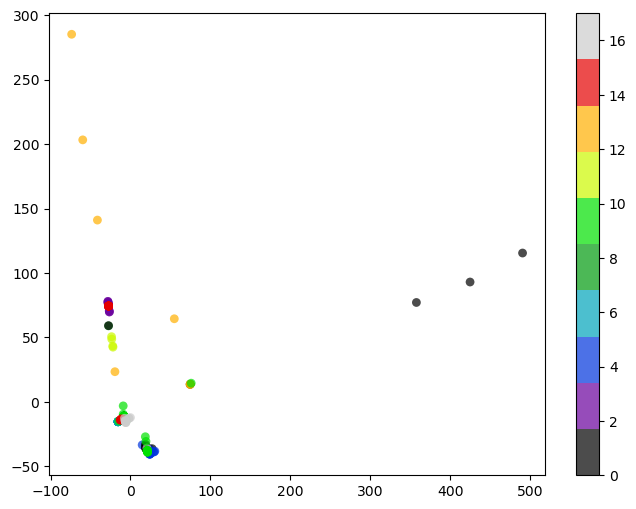

In [51]:
pca = PCA(n_components=6)
X_reduced = pca.fit_transform(X_new)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=encoded_y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

# RF

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

In [38]:
forest = RandomForestRegressor(random_state=17, n_estimators = 10)

In [39]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X_new, encoded_y, test_size=0.3, random_state=17)

In [40]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=17)

In [41]:
print('MSE=%f' % np.sqrt(mean_squared_error(y_train, 
                                 forest.predict(X_train))))

MSE=1.712371


In [42]:
coef=forest.feature_importances_ #для леса - важность признака

pd.DataFrame(forest.feature_importances_, X.columns,
             columns=[ 'coef']).sort_values(by='coef', ascending=False)

,coef
"Al, %",0.210023
"Fe, %",0.207548
"Co, %",0.160696
"V, %",0.104524
"Ni, %",0.079130
"O, %",0.069378
"C, %",0.051364
"TiC, %",0.028535
"Mn, %",0.018637
"P, %",0.011729


## t-SNE

In [43]:
import numpy as np
from sklearn.manifold import TSNE

embed = TSNE(n_components=2, random_state=42,
                  init='random', perplexity=7, n_jobs = -1)

In [45]:
X_embedded = embed.fit_transform(X_new_scaled)

C:\Users\ivan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [46]:
# Вывод результатов
print('New Shape of X: ', X_embedded.shape)
print('Kullback-Leibler divergence after optimization: ', embed.kl_divergence_)
print('No. of iterations: ', embed.n_iter_)

New Shape of X:  (262, 2)
Kullback-Leibler divergence after optimization:  0.5676474571228027
No. of iterations:  999


In [53]:
import plotly.express as px # для визуализации данных
import matplotlib.pyplot as plt 

# Создание диаграммы разброса
fig = px.scatter(None, x=X_embedded[:,0], y=X_embedded[:,1], 
                 labels={
                     "x": "Dimension 1",
                     "y": "Dimension 2",
                 },
                 opacity=1, color=y.astype(str))

# Изменение цвета фона графика
fig.update_layout(dict(plot_bgcolor = 'white'))

# Обновление линий осей
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Установка названия рисунка
fig.update_layout(title_text="Кластеризация классов материала методом t-SNE")

# Обновление размера маркера
fig.update_traces(marker=dict(size=3))

fig.show()

## Линейная регрессия

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [74]:
linreg = LinearRegression() 

In [113]:
X_new_lr = X_new.assign(klass = my_label.fit_transform(data['Класс']))
X_new_lr['klass'] = X_new_lr['klass'].astype(float)

In [114]:
y_new_lr = data['Предел прочности. МПа']

In [115]:
X_new_lr.fillna(0)

,"Al, %","Si, %","Mg, %","Mn, %","Fe, %","Cu, %","Zn, %","Ti, %","TiC, %","Cr, %",...,"Sn, %","Sb, %","Cd, %","Au, %","Pd, %","Ir, %","Se, %","W, %","Ag, %",klass
0,89.0,10.00,0.3,0.45,0.55,0.05,0.1,0.15,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,74.0,0.00,0.0,2.00,0.00,0.50,0.0,0.00,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,6.0,0.00,0.0,0.00,0.25,0.00,0.0,88.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
3,0.6,0.35,0.0,0.35,80.00,0.30,0.0,1.00,0.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0.0,0.00,0.0,0.00,95.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
258,0.0,0.00,0.0,0.00,95.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
259,0.0,0.00,0.0,0.00,95.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
260,0.0,0.00,0.0,0.00,95.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


In [120]:
Xx = scaler.fit_transform(X_new_lr)

In [121]:
X_new_lr_train, X_new_lr_holdout, y_new_lr_train, y_new_lr_holdout = train_test_split(
    Xx, y_new_lr, test_size=0.3, random_state=17
)

In [122]:
linreg.fit(X_new_lr_train, y_new_lr_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Polynomial Pegression 

In [123]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [125]:
poly.fit_transform(X_new_lr, y_new_lr)

array([[  1.,  89.,  10., ...,   0.,   0.,   1.],
       [  1.,  74.,   0., ...,   0.,   0.,  25.],
       [  1.,   6.,   0., ...,   0.,   0., 144.],
       ...,
       [  1.,   0.,   0., ...,   0.,   0., 225.],
       [  1.,   0.,   0., ...,   0.,   0., 225.],
       [  1.,   0.,   0., ...,   0.,   0., 225.]])